# Plot comparison

Plot the comparison between Mandyoc results and UNDERWORLD, I2VEA and STAGE results.

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import sys
import glob

In [2]:
def load_and_plot(ax, file_name, color):
    """
    Function to load and plot the UNDERWORLD, I2VEA and STAGE data
    """
    times, surface_topo = np.loadtxt(
        "{}.txt".format(file_name), 
        unpack=True, 
        delimiter=","
    )
    
    ax.plot(
        times,
        surface_topo, 
        linestyle="-",  
        label=file_name,
        color=color
    )

## Load Mandyoc surface data 
Create a list with the name of the surface files generated by mandyoc:

In [3]:
surface_filenames = sorted(glob.glob(f"sp_surface_global_*"))

nproc = len(glob.glob("step_0-rank_new*"))

In [4]:
surface_topo_mandyoc = np.array([])
times = np.array([])

for f in surface_filenames:
    step = int(f.split(".")[0].split("_")[-1])

    _s = np.loadtxt(f, skiprows=2, comments="P")
    surface_topo_mandyoc = np.append(
        surface_topo_mandyoc, 
        np.abs(np.max(_s))
    )

    if step == 0 and int(surface_topo_mandyoc) == 0:
        surface_topo_mandyoc = 1.5e5

    # read time
    with open(f"time_{step}.txt") as time_file:
        time_info = time_file.readline()
        _t = float(time_info.split(":")[-1])
        times = np.append(times, _t)

# Sort the data according to time because 
# the list of file names (surface_filenames) isn't sorted correctly
arg_sorted = np.argsort(times)
times = times[arg_sorted]
surface_topo_mandyoc = surface_topo_mandyoc[arg_sorted]

surface_topo_mandyoc = 1.5e5 - surface_topo_mandyoc        

## Create the plot

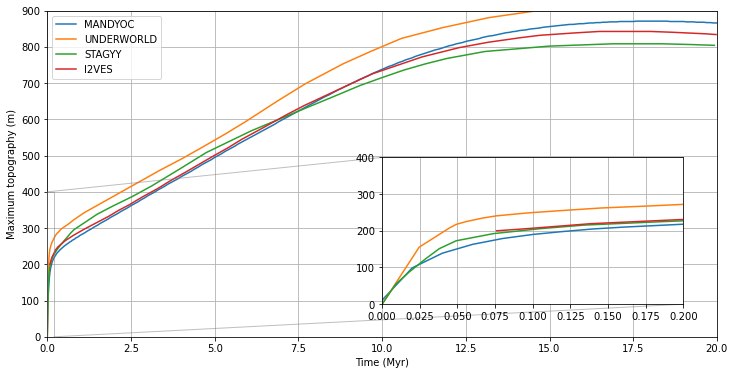

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mandyoc data 
ax.plot(
    times / 1.0e6, 
    surface_topo_mandyoc, 
    linestyle="-",  
    label="MANDYOC",
     color="C0"
)
# Plot UNDERWORLD, I2VEA and STAGE data
files_names = ["UNDERWORLD", "STAGYY", "I2VES"]
colors= ["C1", "C2", "C3"]
for file_name, color in zip(files_names, colors):
    load_and_plot(ax, file_name, color=color)
    
plt.legend(loc="upper left")

ax.grid("on")
ax.set_xlim((0, 20))
ax.set_ylim((0, 900))
ax.set_xlabel("Time (Myr)")
ax.set_ylabel("Maximum topography (m)")

# Creae a zoom plot
# inset axes....
axins = ax.inset_axes([0.5, 0.1, 0.45, 0.45])
axins.plot(
    times / 1.0e6, 
    surface_topo_mandyoc, 
    linestyle="-",  
    label="MANDYOC",
     color="C0"
)
for file_name, color in zip(files_names, colors):
    load_and_plot(axins, file_name, color=color)

# sub region of the original image
x1, x2, y1, y2 = 0, 0.2, 0, 400
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid("on")

ax.indicate_inset_zoom(axins)

plt.show()